## K-means for Image segmentation / Image compression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(500, 512, 3)


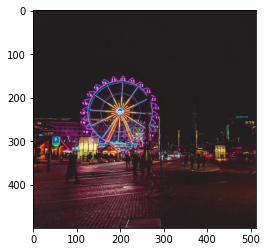

In [6]:
#load and rescale the image to 500x500
image = plt.imread('test.jpg')
plt.imshow(image)
print(image.shape)

In [7]:
# implement the k-means algorithm
def kmeans(k, df_stand_array, centroids):
    #initialize the indicator matrix
    indicator = np.zeros((df_stand_array.shape[0], k))
    #initialize the centroids
    #initialize the previous centroids
    prev_centroids = np.zeros((k, df_stand_array.shape[1]))
    #initialize the number of iterations
    iterations = 0
    
    # E step
    #initialize the distance between the previous and current centroids
    distance = np.linalg.norm(centroids - prev_centroids)
    #while the distance between the previous and current centroids is greater than 0.001
    while distance > 0.001:
        #for each point in the dataset
        for i in range(df_stand_array.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            j = np.argmin(np.linalg.norm(df_stand_array[i] - centroids, axis=1))
            indicator[i, j] = 1
            if j==1:
                indicator[i,0]=0
            else:
                indicator[i,1]=0
        
        iter.append(iterations+0.5)
        # M step
        for i in range(k):
            #calculate the mean of each cluster
            centroids[i] = np.mean(df_stand_array[np.where(indicator[:, i] == 1)], axis=0)
        #print(centroids)
        #increment the number of iterations
        iterations += 1
  
        #calculate the distance between the previous and current centroids
        distance = np.linalg.norm(centroids - prev_centroids)
        #set the previous centroids to the current centroids
        prev_centroids = centroids
    for i in range(df_stand_array.shape[0]):
            #calculate the distance between the point and each centroid and store them in a numpy array
            j = np.argmin(np.linalg.norm(df_stand_array[i] - centroids, axis=1))
            indicator[i, j] = 1
            if j==1:
                indicator[i,0]=0
            else:
                indicator[i,1]=0
        #for each cluster
    return centroids, indicator, iterations

In [51]:
#convert image into a numpy array
df_stand_array = np.array(image, dtype=float)

for i in range(2,3):
    #randomly select a number between 1 and 499 and store it in x
    x = np.random.randint(1, df_stand_array.shape[0]-1)
    temp = df_stand_array[x,:,:]
    #randomly select two rows from temp and store them in centroids
    centroids = temp[np.random.choice(temp.shape[0], i, replace=False)]
    #call the k-means algorithm
    centroids, indicator, iterations = kmeans(i, df_stand_array, centroids)
    print(centroids)





ValueError: operands could not be broadcast together with shapes (2,3) (2,512) 